<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>BESLISSINGSBOOM: TITANIC - grote dataset</h1>    
    </font>
</div>

Er is heel wat geweten over de passagiers op de Titanic, zoals langs welk dek ze aan boord gingen, of ze in eerste, tweede of derde klasse reisden, of ze broers, zussen, een echtgenoot(ote), kinderen of ouders aan boord hadden, en of ze het ongeluk met de Titanic overleefden of niet.<br>
Je beschikt over een dataset, trainTitanic.csv, die je vindt in de map data. <br>
Stel op basis van deze dataset een beslissingsboom op die voorspelt wie overleeft en wie niet.

### Voorbeeldoplossing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

In [2]:
titanic = pd.read_csv("data/trainTitanic.csv") 

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# overbodige kolommen verwijderen
del titanic["PassengerId"]
del titanic["Name"]
del titanic["Ticket"]
del titanic["Fare"]
del titanic["Cabin"]

In [5]:
# categorische variabelen numeriek maken, naam passagier, passengerID, ticket en fare hebben we niet nodig
titanic["Sex"]= titanic["Sex"].replace("female", 0)
titanic["Sex"]= titanic["Sex"].replace("male", 1)
titanic["Embarked"]= titanic["Embarked"].replace("S", 0)
titanic["Embarked"]= titanic["Embarked"].replace("C", 1)
titanic["Embarked"]= titanic["Embarked"].replace("Q", 2)

In [6]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.0
887,1,1,0,19.0,0,0,0.0
888,0,3,0,NaN,1,2,0.0
889,1,1,1,26.0,0,0,1.0


In [7]:
titanic = titanic.dropna()

In [8]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,2.0
886,0,2,1,27.0,0,0,0.0
887,1,1,0,19.0,0,0,0.0
889,1,1,1,26.0,0,0,1.0


In [9]:
titanic = np.array(titanic)

In [10]:
titanic

array([[0., 3., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 3., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 3., 1., ..., 0., 0., 2.]])

De beschouwde parameters zijn 'passagiersklasse', 'geslacht', 'leeftijd', 'broers, zussen, echtgenoot(ote)', 
ook 'ouders en kinderen' en 'aan boord gegaan'.<br>
De beschouwde parameters staan in resp. kolom ) 1, 2, ..., 6 van matrix.<br>
Elke rij komt overeen met één persoon.<br>
De eerste kolom geeft of persoon overleefde ('1') of niet ('0').

In [11]:
# parameters en klasse onderscheiden
parameters = titanic[:, 1:]        # laatste 6 kolommen van matrix zijn beschouwde parameters
klasse = titanic[:, 0]             # eerste kolom zijn klasse waartoe persoon behoort

In [12]:
print(parameters)

[[ 3.  1. 22.  1.  0.  0.]
 [ 1.  0. 38.  1.  0.  1.]
 [ 3.  0. 26.  0.  0.  0.]
 ...
 [ 1.  0. 19.  0.  0.  0.]
 [ 1.  1. 26.  0.  0.  1.]
 [ 3.  1. 32.  0.  0.  2.]]


In [13]:
print(klasse)

[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.

In [14]:
# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(parameters, klasse)                           # boom genereren die overeenkomt met data

DecisionTreeClassifier()

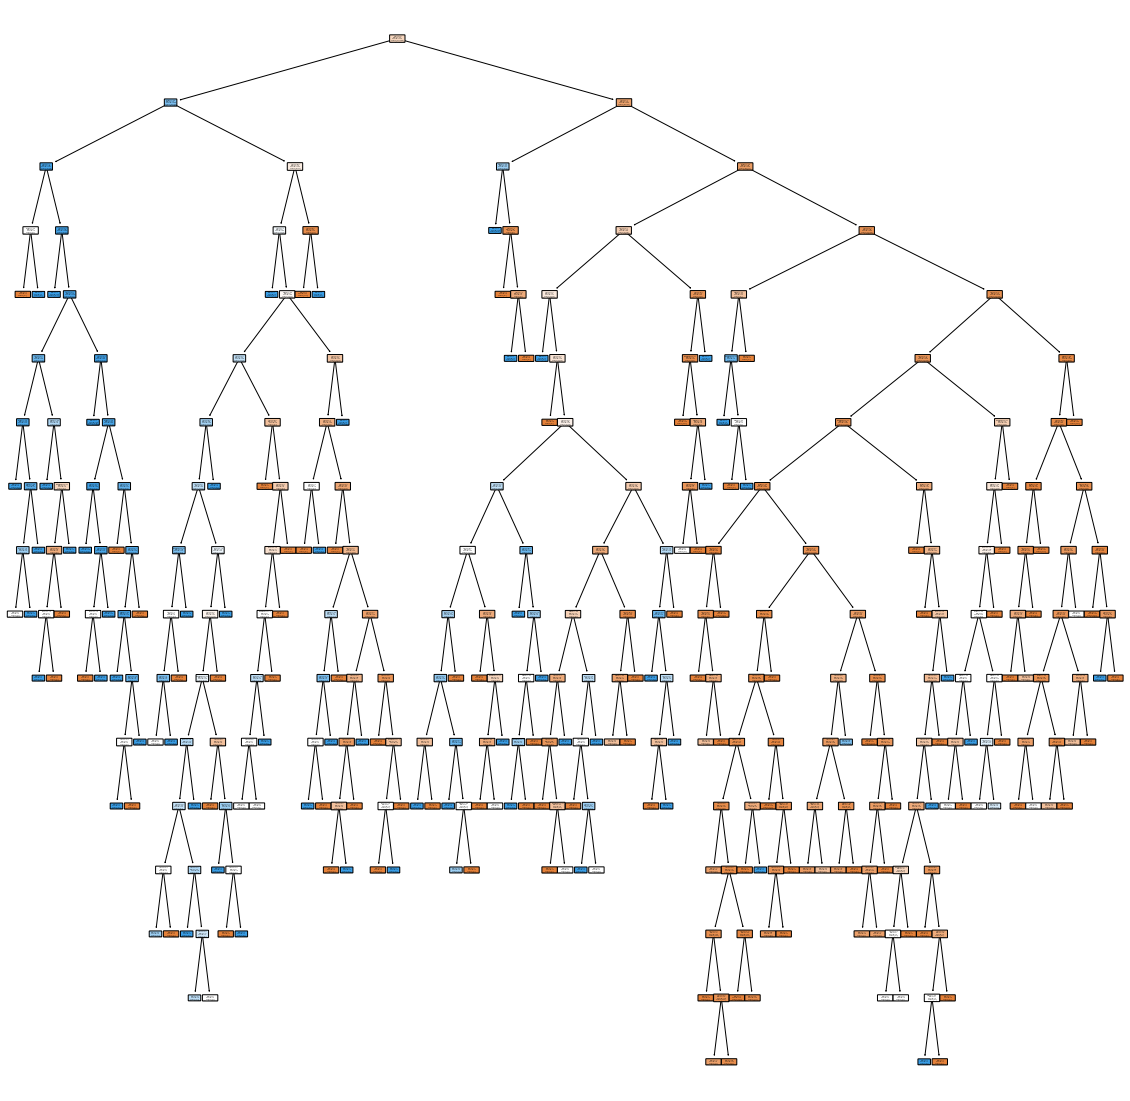

In [15]:
plt.figure(figsize=(20,20))  
tree.plot_tree(beslissingsboom, 
               class_names=["overleefde niet", "overleefde"], 
               feature_names=["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"], 
               filled=True, rounded=True)
plt.show()

### Referenties

Kaggle. Titanic - Machine Learning from Disaster.<br>
&nbsp; &nbsp; &nbsp; &nbsp; Geraadpleegd op 9 december 2021 via https://www.kaggle.com/c/titanic/data

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 